## Probability

### Coin Flips and Multiplication of Probabilities

This notebook continues to explore probability distributions, this time using coin flips as examples. This notebook uses the `pracpred` package introduced in [the previous notebook on probability distributions](https://github.com/practicallypredictable/posts/blob/master/notebooks/probability-part2-distribution-dice.ipynb). If you haven't already installed this package in your sports analytics environment, the following Jupyter Notebook command will install it for you.

In [1]:
%%capture
import sys
!{sys.executable} -m pip install pracpred

You can also run the command `pip install pracpred` in your Terminal (Mac or Linux) or in Anaconda Prompt (Windows). Let's import the packages we are going to use in this post.

In [2]:
import pracpred.prob as ppp

In [3]:
from collections import Counter, OrderedDict
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.5e}'.format

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_context('notebook')
plt.style.use('ggplot')

### Fair Coins

A coin can land heads or tails, signified by H and T respectively. Here's a model of a fair coin.

In [5]:
fair_coin = ppp.ProbDist({'H', 'T'})
fair_coin.name = 'fair coin'
print(fair_coin)

fair coin = {H: 1/2, T: 1/2}


The probabilities of each outcome are automatically set to $\frac 1 2$ since there are two outcomes. Each outcome is assumed to be equally probable if there is no other information.

### Biased Coins

However, if you want to represent a coin biased to land heads more often than tails, you can do that very easily. For example, here is a model of a coin with a $\frac 5 9$ probability of landing heads.

In [6]:
biased_coin = ppp.ProbDist(H=5, T=4)
biased_coin.name = 'biased coin'
print(biased_coin)

biased coin = {H: 5/9, T: 4/9}


### Two Coin Flips

If you flip the fair coin twice, there are four possible outcomes.  The four outcomes are HH, HT, TH and TT. Notice that HT is a different outcome from TH. In this framework, the order of the flips matters.


We will assume as usual that the coin flips are [independent](https://en.wikipedia.org/wiki/Independence_(probability_theory), since there is no reason to believe that the first flip should physically affect the other. All the outcomes are still equally likely, so they should each have probability $\frac 1 4$.

In [7]:
fair_coin + fair_coin

ProbDist({'HH': Prob(1, 4), 'HT': Prob(1, 4), 'TH': Prob(1, 4), 'TT': Prob(1, 4)})

Another way of thinking about this experiment is that we have two fair coins that we are going to flip at the same time, but we can tell them apart. Maybe the coins are of two different types, but they are both fair. Under this interpretation, HT is still different from TH. However, rather than ordering the flips, the first character represents coin 1 and the second character represents coin 2.

Now suppose that coin 1 is fair, and coin 2 is biased. What is the distribution of the outcomes?

The two coin flips are still assumed to be independent. There's no physical reason to think that the bias of coin 2 impacts the result of flipping coin 1. There are still four possible outcomes, but they aren't equally likely any more.

We can figure out the answer by using a simple [thought experiment](https://en.wikipedia.org/wiki/Thought_experiment).

### Ping Pong Balls in a Box

Imagine we are going to represent our outcomes as plain white ping pong balls.

We want each ball to represent a possible outcome, but reflecting the correct probability that the outcome happens. How many balls do we need to have inside the box to represent our flip of the fair and biased coin?

For the biased coin, the probability of heads is $\frac 5 9$, so if we had 9 balls in the box, 5 of them would represent heads. If we had 18 balls in the box, 10 of them would represent heads of the biased coin.

For the fair coin, in theory we only need 2 balls, of which one would represent heads. We can have more than 2 balls though. Any even number would do. Half would represent heads, and the other half would represent tails. Since 18 is an even number, 18 balls works for the fair coin as well. Of these 18 balls, 9 would represent heads of the fair coin.

### A Thought Experiment

Here comes the thought experiment. We have 18 plain white ping pong balls. Paint 10 of them blue on one-half of the ball. These represent the heads of the biased coin. It doesn't matter which 10 plain white balls we pick for this step. The other 8 balls are still plain white.

After the blue paint dries, take half of the plain white balls, and paint them red on one-half of the ball. That's 4 balls now half-red, with the other half white. Now take half of the 10 balls half-painted blue, and paint the other half of those balls red. That's 5 balls half-red, half blue.

There are $9 = 5 + 4$ balls which have some red paint. These 9 balls represent the heads of the fair coin. Notice that since we took half of the 8 plain white balls and half of the 10 balls half-painted blue, it must be true that overall, half of the 18 balls have some red paint on them.

After the paint dries, put the balls back inside a box that we can't see through. The event that both coins land heads is just the outcome that we pick a random ping pong ball out of the box and it comes up half-blue, half-red. How many balls (out of the 18 total balls) are painted this way? We already know the answer is 5.

Picking ping pong balls at random out of a box is back in the world of equally probable outcomes. We assume that the paint color doesn't impact our random choice of ball since we can't see the paint and we can't tell the difference between the balls without looking at them.

Since there are 5 half-blue, half-red ping pong balls, the probability of drawing one of those balls is $\frac 5 {18}$. But, since drawing one of these ping pong balls also represents the outcome 'HH' for our coin flip experiment, that outcome must also have probability $\frac 5 {18}$.

### The Multiplication Rule for Probability

It may have been obvious all along, but the rule for independent events is just to multiply the probabilities of each event. If we have two independent events $A$ and $B$, which have respective probabilities $P(A)$ and $P(B)$, then the probability of the joint outcome $P(A \cap B) = P(A) \times P(B)$. Note that the match symbol $\cap$ can be read "and" or "intersection".

Here is a simple visualization for the fair and biased coin flips. The red area represents heads on the fair coin, and the blue area represents heads on the biased coin. The overlapping purple area is where both coins are heads. The unshaded area is where both coins are tails. If you change the coin probabilities, you can run the code below and it will adjust the shaded areas automatically.

In [8]:
def plot_coins(coin1, coin2):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_aspect('equal')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    coin1_heads = plt.Rectangle((0, 0), float(coin1['H']), 1, color='r', alpha=0.2)
    coin2_heads = plt.Rectangle((0, 0), 1, float(coin2['H']), color='b', alpha=0.2)
    ax.add_artist(coin1_heads)
    ax.add_artist(coin2_heads)
    ax.set_xlabel(f'{coin1.name}: red = P(heads)')
    ax.set_ylabel(f'{coin2.name}: blue = P(heads)')
    ax.set_title(f'flip both {coin1.name} and {coin2.name}: purple = P(both heads)')
    start, end = ax.get_xlim()
    plt.xticks(np.arange(0, 1.001, 0.1))
    plt.yticks(np.arange(0, 1.001, 0.1))
    plt.show()

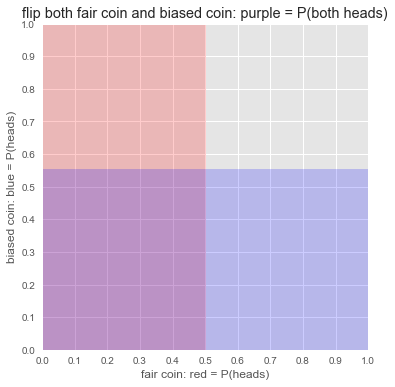

In [9]:
plot_coins(fair_coin, biased_coin)

To discover the multiplication rule, we assumed that the coin flips were independent events. It turns out there is a more general result that applies for dependent events as well, but we will set that aside for the time being.

The `ProbDist` class can compute the joint probability of independent events automatically for you.

In [10]:
fair_coin + biased_coin

ProbDist({'HH': Prob(5, 18), 'HT': Prob(2, 9), 'TH': Prob(5, 18), 'TT': Prob(2, 9)})

### Playing with Biased Coins

Now, let's pretend that we don't know which coin is biased or by how much, but we're told that one of them is biased. We don't have enough information to compute the probabilities of each outcome anymore. Even so, we can learn something interesting by grouping the HT and TH outcomes together.

In [11]:
def ignore_order(flips):
    return ''.join(sorted(flips))

In [12]:
(fair_coin + biased_coin).groupby(ignore_order)

ProbDist({'HH': Prob(5, 18), 'HT': Prob(1, 2), 'TT': Prob(2, 9)})

As long as we are sure one coin is fair, the outcome where one coin is heads and the other tails always has probability $\frac 1 2$, even if we don't know which coin is which. The great mathematician [John von Neumann](https://en.wikipedia.org/wiki/John_von_Neumann) actually took this a step further to come up with a way to always get perfectly fair coin flips, even if you only have a biased coin.

The procedure is simple. Just flip a biased coin twice, and only look at outcomes where one flip lands heads, and the other flip lands tails. If you get HH or TT, ignore the results and do two more flips until you get either HT or TH.

In [13]:
biased_coin.repeated(2)

ProbDist({'HH': Prob(25, 81), 'HT': Prob(20, 81), 'TH': Prob(20, 81), 'TT': Prob(16, 81)})

In [14]:
def different_flips(flip):
    return len(set(flip)) > 1

Now, just call HT "heads" and TH "tails.

In [15]:
(biased_coin + biased_coin).such_that(different_flips)

ProbDist({'HT': Prob(1, 2), 'TH': Prob(1, 2)})

To see why this works, look back at the probability distribution for 2 flips of the biased coin. Both $P(HT)$ and $P(TH)$ are the same. The outcomes HH and TT have different probabilities, but we are ignoring those outcomes. If we throw away the outcomes HH and TT, the outcomes HT and TH have equal probabilities and so represent a fair coin.

Another way to see why this works is as follows. The probability of HT is:
$$P(HT) = P(H)P(T)$$
This is true because each coin flip is independent. Similarly, the probability of TH is:
$$P(TH) = P(T)P(H) = P(H)P(T)$$
This is true because multiplication is commutative: the order doesn't matter. Since we can tell the difference between the outcomes HT and TH, but they have the same probability, we can pretend that one is "heads" and the other "tails" from a fair coin. You can [read more about this here](http://www.billthelizard.com/2009/09/getting-fair-toss-from-biased-coin.html).

Even if your coin is very biased, this procedure still works.

In [16]:
very_biased_coin = ppp.ProbDist(H=0.9, T=0.1)
very_biased_coin.name = 'very biased coin'

In [17]:
very_biased_coin.repeated(2)

ProbDist({'HH': Prob(81, 100), 'HT': Prob(9, 100), 'TH': Prob(9, 100), 'TT': Prob(1, 100)})

In [18]:
very_biased_coin.repeated(2).such_that(different_flips)

ProbDist({'HT': Prob(1, 2), 'TH': Prob(1, 2)})

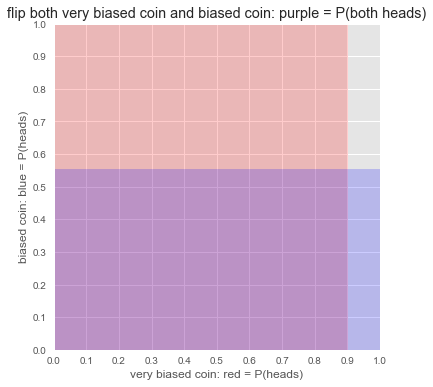

In [19]:
plot_coins(very_biased_coin, biased_coin)

The only problem is you might have to wait a while to get HT or TH, if your coin is very biased. In a later post, we'll see how to figure out how many flips you should expect to wait before you get HT or TH for biased coins.

### Coin Flipping Experiment

Let's finish up by showing how to generate random coin tosses from our fair and biased coins. We'll start by computing the theoretical probabilities we expect to get. Then we'll simulate thousands of results from the probability model and compare to the theoretical probabilities.

Let's focus on the number of heads we get if we flip a coin 12 times.

In [20]:
FLIPS = 12

In [21]:
len(fair_coin.repeated(FLIPS))

4096

There are 4096 possible outcomes for each experiment.

In [22]:
list(fair_coin.repeated(FLIPS).items())[:10]

[('TTTTTTTTTTTT', Prob(1, 4096)),
 ('TTTTTTTTTTTH', Prob(1, 4096)),
 ('TTTTTTTTTTHT', Prob(1, 4096)),
 ('TTTTTTTTTTHH', Prob(1, 4096)),
 ('TTTTTTTTTHTT', Prob(1, 4096)),
 ('TTTTTTTTTHTH', Prob(1, 4096)),
 ('TTTTTTTTTHHT', Prob(1, 4096)),
 ('TTTTTTTTTHHH', Prob(1, 4096)),
 ('TTTTTTTTHTTT', Prob(1, 4096)),
 ('TTTTTTTTHTTH', Prob(1, 4096))]

The flips are assumed to be independent. Also, we only care about the number of heads, not the order, so we can summarize the outcomes by number of heads.

In [23]:
def number_of_heads(flips):
    return flips.count('H')

In [24]:
fair_heads_dist = fair_coin.repeated(FLIPS).groupby(number_of_heads)
fair_heads_dist.name = 'fair heads pmf'
print(fair_heads_dist)

fair heads pmf = {0: 1/4096, 1: 3/1024, 2: 33/2048, 3: 55/1024, 4: 495/4096, 5: 99/512, 6: 231/1024, 7: 99/512, 8: 495/4096, 9: 55/1024, 10: 33/2048, 11: 3/1024, 12: 1/4096}


Summarizing by number of heads reduces the sample space to the numbers between 0 and 12. Let's compute the same probabilities for the biased and very biased coins.

In [25]:
biased_heads_dist = biased_coin.repeated(FLIPS).groupby(number_of_heads)
biased_heads_dist.name = 'biased heads pmf'
very_biased_heads_dist = very_biased_coin.repeated(FLIPS).groupby(number_of_heads)
very_biased_heads_dist.name = 'very biased heads pmf'

Let's look at the probability mass functions for each coin assuming we run the same experiment of 12 coin flips.

In [26]:
pmf = pd.DataFrame(OrderedDict({
    dist.name: [float(dist[i]) for i in range(FLIPS+1)] for dist in [
        fair_heads_dist,
        biased_heads_dist,
        very_biased_heads_dist,
    ]
}))
pmf

,fair heads pmf,biased heads pmf,very biased heads pmf
0,2.44141e-04,5.94032e-05,1.00000e-12
1,2.92969e-03,8.91048e-04,1.08000e-10
2,1.61133e-02,6.12595e-03,5.34600e-09
3,5.37109e-02,2.55248e-02,1.60380e-07
4,1.20850e-01,7.17885e-02,3.24769e-06
5,1.93359e-01,1.43577e-01,4.67668e-05
6,2.25586e-01,2.09383e-01,4.91051e-04
7,1.93359e-01,2.24339e-01,3.78811e-03
8,1.20850e-01,1.75265e-01,2.13081e-02
9,5.37109e-02,9.73694e-02,8.52325e-02


Since we have some very small numbers for these probabilities, we're using [scientific notation](https://en.wikipedia.org/wiki/Scientific_notation) in the table so you can see all the numbers to equal precision. If we didn't use scientific notation, you'd see a lot of zeroes in the table for the very biased coin.

As a check, let's make sure the PMFs all sum to one for each coin.

In [27]:
pmf.sum()

fair heads pmf          1.00000e+00
biased heads pmf        1.00000e+00
very biased heads pmf   1.00000e+00
dtype: float64

### Visualizing Probability Mass Functions

Let's plot these PMFs so we can visualize the differences between the coin outcomes.

In [28]:
x1, y1 = fair_heads_dist.zipped
x2, y2 = biased_heads_dist.zipped
x3, y3 = very_biased_heads_dist.zipped

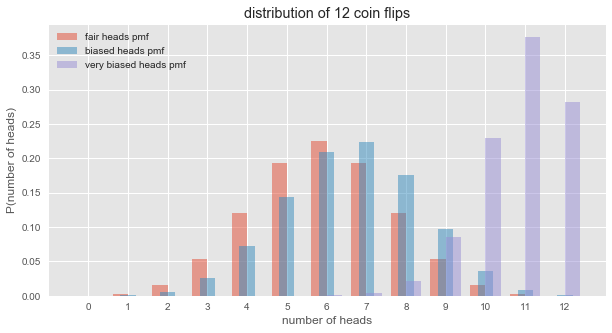

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
width = 5/len(x1)
ax.bar([x-width/2 for x in x1], y1, width, alpha=0.5, label=fair_heads_dist.name)
ax.bar([x for x in x2], y2, width, alpha=0.5, label=biased_heads_dist.name)
ax.bar([x+width/2 for x in x3], y3, width, alpha=0.5, label=very_biased_heads_dist.name)
ax.set_xticks(x1)
ax.set_xlabel('number of heads')
ax.set_ylabel('P(number of heads)')
ax.set_title(f'distribution of {FLIPS} coin flips')
ax.legend(loc='upper left')
plt.show()

The fair coin distribution is _symmetric_ but the biased coins are [_skewed_](https://en.wikipedia.org/wiki/Skewness) to the right. The very biased coin distribution is extremely skewed.

### Simulating Coin Flips

Now we will generate a simulation of random coin flips for each of the three coins.

In a future post, we'll use this type of simluation to build a simple prediction model for tennis.

Here's how to generate a random set of independent coin flips.

In [30]:
flips = biased_coin.choices(FLIPS)
flips

['T', 'T', 'H', 'H', 'T', 'T', 'H', 'T', 'H', 'H', 'T', 'H']

Now we can generate a large number of trials (in this case, 10,000) for each experiment. Again, the experiment is flipping the coin 12 times and counting up the number of heads.

In [31]:
def flip(coin, summarize, per_trial, trials):
    return [summarize(coin.choices(per_trial)) for _ in range(trials)]

In [32]:
TRIALS = 10_000

In [33]:
fair_heads = flip(fair_coin, summarize=number_of_heads, per_trial=FLIPS, trials=TRIALS)
len(fair_heads)

10000

The average number of heads per experiment is about 6, which is reasonable for a fair coin. Remember, this average is over 10,000 trials.

In [34]:
sum(fair_heads)/len(fair_heads)

6.0096

Now let's do the same thing for the biased and very biased coins.

In [35]:
biased_heads = flip(biased_coin, summarize=number_of_heads, per_trial=FLIPS, trials=TRIALS)
very_biased_heads = flip(very_biased_coin, summarize=number_of_heads, per_trial=FLIPS, trials=TRIALS)

In [36]:
sum(biased_heads)/len(biased_heads)

6.6556

In [37]:
sum(very_biased_heads)/len(very_biased_heads)

10.7899

The average number of heads for the biased coin is higher than 6, but still relatively close. The average for the very biased coin is almost 11.

Now let's build a table of the frequency of all the outcomes for each coin experiment. The frequency is just the count of each outcome (number of heads) divided by the total number of trials.

In [38]:
def frequency(outcomes, force_len=None):
    c = Counter(outcomes)
    if force_len: # include zeroes up to the specified number of outcomes
        for i in range(force_len+1):
            if i not in c:
                c[i] = 0
    return {n: x/sum(c.values()) for (n, x)  in c.items()}

In [39]:
EXPERIMENT = {
    'fair freq': fair_heads,
    'biased freq': biased_heads,
    'very biased freq': very_biased_heads,
}

In [40]:
freq = pd.DataFrame(OrderedDict({
    outcomes: frequency(EXPERIMENT[outcomes], force_len=FLIPS) for outcomes in EXPERIMENT
}))
freq

,fair freq,biased freq,very biased freq
0,2.00000e-04,0.00000e+00,0.00000e+00
1,3.20000e-03,6.00000e-04,0.00000e+00
2,1.50000e-02,5.90000e-03,0.00000e+00
3,5.51000e-02,2.48000e-02,0.00000e+00
4,1.15500e-01,7.07000e-02,0.00000e+00
5,1.89700e-01,1.43000e-01,0.00000e+00
6,2.33100e-01,2.18600e-01,1.00000e-03
7,1.94700e-01,2.24200e-01,3.10000e-03
8,1.22600e-01,1.73800e-01,2.20000e-02
9,5.37000e-02,9.47000e-02,8.81000e-02


The sum of the frequencies had also better be 1, since we divided all the counts by the number of trials in each experiment.

In [41]:
freq.sum()

fair freq          1.00000e+00
biased freq        1.00000e+00
very biased freq   1.00000e+00
dtype: float64

### Comparing the Frequencies and the Probabilities

If we can run an experiment a large number of times, the _relative frequency_ of an outcome should be close to the probability of that outcome. The relative frequency is just the number of trials having that outcome, divided by the total number of trials in the experiment.

In fact, in the [Frequentist view of probability](https://en.wikipedia.org/wiki/Frequentist_probability), the definition of probability is just the limit of relative frequency as you imagine doing more and more trials in the experiment.

Let's put the theoretical probabilities and observed frequencies for each coin flipping experiment in a table. Hopefully, the observed frequencies are reasonable compared to the theoretical probabilities.

In [42]:
df = freq.merge(pmf, left_index=True, right_index=True)
cols = sorted(df.columns)
df = df[cols]
df

,biased freq,biased heads pmf,fair freq,fair heads pmf,very biased freq,very biased heads pmf
0,0.00000e+00,5.94032e-05,2.00000e-04,2.44141e-04,0.00000e+00,1.00000e-12
1,6.00000e-04,8.91048e-04,3.20000e-03,2.92969e-03,0.00000e+00,1.08000e-10
2,5.90000e-03,6.12595e-03,1.50000e-02,1.61133e-02,0.00000e+00,5.34600e-09
3,2.48000e-02,2.55248e-02,5.51000e-02,5.37109e-02,0.00000e+00,1.60380e-07
4,7.07000e-02,7.17885e-02,1.15500e-01,1.20850e-01,0.00000e+00,3.24769e-06
5,1.43000e-01,1.43577e-01,1.89700e-01,1.93359e-01,0.00000e+00,4.67668e-05
6,2.18600e-01,2.09383e-01,2.33100e-01,2.25586e-01,1.00000e-03,4.91051e-04
7,2.24200e-01,2.24339e-01,1.94700e-01,1.93359e-01,3.10000e-03,3.78811e-03
8,1.73800e-01,1.75265e-01,1.22600e-01,1.20850e-01,2.20000e-02,2.13081e-02
9,9.47000e-02,9.73694e-02,5.37000e-02,5.37109e-02,8.81000e-02,8.52325e-02


The observed values look reasonable compared to the probabilities, so our code seems to be working. Of course, the observed frequencies don't exactly equal the probabilities.  Notice, for example, on the very biased coin, that we didn't get fewer than 6 heads on any trial. As you can see in the rightmost column, the probability of getting 5 heads is a little less than 5 parts in 100,000. So it's not very surprising that we didn't see the outcome 5 heads in our experiment. If we increased the number of trials to 100,000, we would expect to see at least a few trials with 5 heads.

One important thing to keep in mind is that we're doing this "experiment" on a computer, using the random number generators that are avialable with Python. In the real world, the randomness of coin flips comes from how the coin rotates in the air, and what happens if and when it is allowed to hit a hard surface. We are assuming that our computer-generated randomness is a good approximate to "real" randomness. This is an important topic, which we may return to in later posts. In the meantime, if you're curious, [here's a brief article about how computers deal with random numbers](https://www.howtogeek.com/183051/htg-explains-how-computers-generate-random-numbers/).